## Кластерный анализ. Метод k-средних (k-means)
Идея:  
* Решаем на сколько кластеров будем делить наблюдения.  
* Случайно выбираем случайные позиции центроидов кластера.  
* Выводим центроиды на лучшие позиции.  
* Повторяем алгоритм до тех пор, пока после очередного обновления центров ни одна точка не поменяет свою принадлежность.

Улучшения алгоритма:  
* Позиции центроидов выбирать не случайно, а как можно дальше друг от друга (k-means++).  
* Проверить правильность разбиения наблюдений можно при помощи статистики.  
Если много много раз повторять алгоритм и результаты выполнения будут одинаковыми, то в наших данных есть структура.  
Иначе четкой структуры нет, и алгоритм может попадать в локальный минимум.

### Задача  
Кластеризовать ирис на 3 вида методом k-средних, используя параметры:  
* длину наружной доли околоцветника (sepal length);
* ширину внутренней доли околоцветника (petal width).

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['sepal length (cm)', 'petal width (cm)']].values

clusters = ('red', 'green', 'blue')
n_clusters = len(clusters)

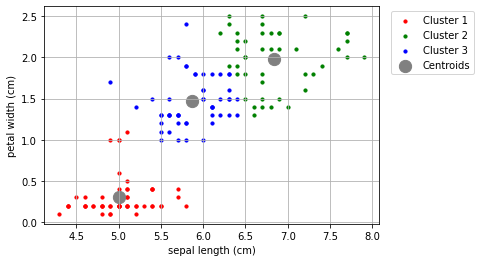

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
lables = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

for i, color in enumerate(clusters):
    plt.scatter(X[lables==i, 0], X[lables==i, 1], s=10, c=color, label=f'Cluster {i+1}')

plt.scatter(centers[:, 0], centers[:, 1], s=150, c='grey', label='Centroids')

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()

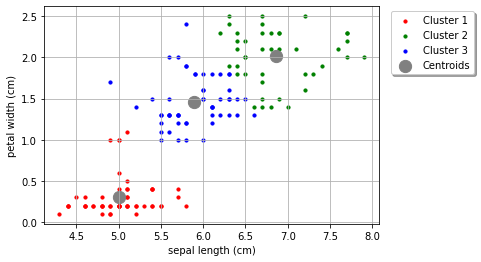

In [3]:
from scipy.cluster.vq import kmeans2

centers, lables = kmeans2(X, n_clusters, minit='++')

for i, color in enumerate(clusters):
    plt.scatter(X[lables==i, 0], X[lables==i, 1], s=10, c=color, label=f'Cluster {i+1}')
plt.scatter(centers[:, 0], centers[:, 1], s=150, c='Grey', label = 'Centroids')

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), shadow=True)
plt.grid()
plt.show()

## Выбор числа кластеров  
Идея: если добавление ещё одного кластера в наши данные значительно понижает общую сумму квадратов,  
это означает, что в увеличении числа кластеров есть смысл. Если последующее увеличение не оказывает  
сильного влияния на общую сумму квадратов, то оптимальное количество кластеров найдено.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


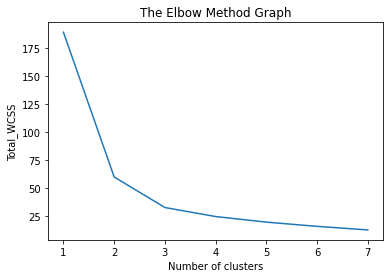

In [4]:
total_wcss = []
n_clusters = 8

for i in range(1, n_clusters): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,  n_init=10, random_state=0)
    kmeans.fit(X)
    total_wcss.append(kmeans.inertia_)

plt.plot(range(1,n_clusters),total_wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Total_WCSS')
plt.show()